# Dataset Analyse for VOC


In [22]:
#load src to path 
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [63]:
#Load required dependancies 
import torch 
import torchvision
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


In [3]:
#Load the dataset
train_dataset = torchvision.datasets.VOCSegmentation(root = "F:\Datasets\VOC", download = False, image_set= 'train')
test_dataset = torchvision.datasets.VOCSegmentation(root = "F:\Datasets\VOC", download = False, image_set= 'val')


In [4]:
class_dict = {0: 'background',
                1: 'aeroplane',
                2: 'bicyle',
                3: 'bird',
                4: 'boat',
                5: 'bottle',
                6: 'bus',
                7: 'car',
                8: 'cat',
                9: 'chair',
                10: 'cow',
                11: 'diningtable',
                12: 'dog',
                13: 'horse',
                14: 'motorbike',
                15: 'person',
                16: 'pottedplant',
                17: 'sheep',
                18: 'sofa',
                19: 'train',
                20: 'tvmonitor'
            }


## Data of train dataset

Train dataset size : 1464
<class 'PIL.Image.Image'>
width:  333
height: 500
<class 'PIL.PngImagePlugin.PngImageFile'>


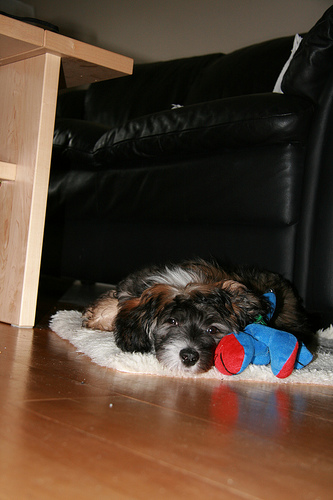

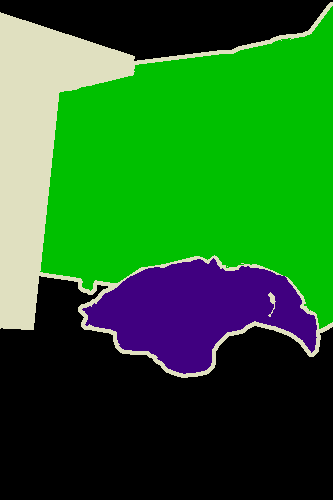

background
dog
sofa


In [5]:
#Look at the length of both train and test dataset 
print('Train dataset size : {}'.format(len(train_dataset)))

sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
image, label = train_dataset[sample_idx]
print(type(image))
w, h = image.size
print('width: ', w)
print('height:', h)
print(type(label))
display(image)
display(label)
np_label = np.array(label)
np_classes = np.unique(np_label)
for k in range(len(np_classes)-1):
    print(class_dict[np_classes[k]])


## Data of test dataset

Test dataset size : 1464
<class 'PIL.Image.Image'>
width:  500
height: 375
<class 'PIL.PngImagePlugin.PngImageFile'>


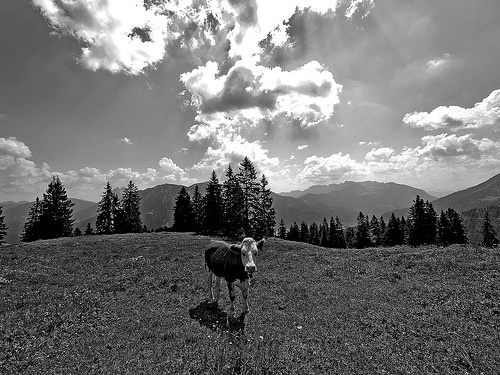

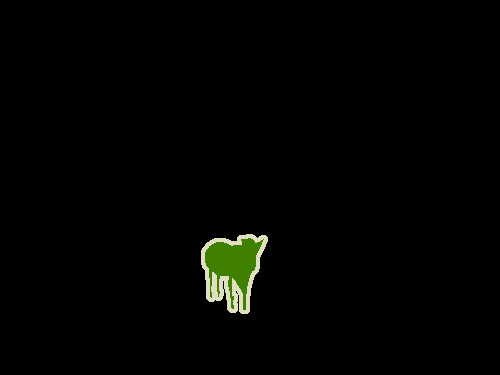

background
cow


In [6]:
#Look at the length of both train and test dataset 
print('Test dataset size : {}'.format(len(train_dataset)))

sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
image, label = train_dataset[sample_idx]
print(type(image))
w, h = image.size
print('width: ', w)
print('height:', h)
print(type(label))
display(image)
display(label)
np_label = np.array(label)
np_classes = np.unique(np_label)
for k in range(len(np_classes)-1):
    print(class_dict[np_classes[k]])

## Inference test 

In [165]:
from src.models.UNet import UNet, EncoderBlock, DecoderBlock, CNNBlock, CNNBlockX2
model = UNet(3,21)
model.load_state_dict(torch.load("../models/unet_voc_overfitted.pth"))
model.eval()


UNet(
  (entryDoubleBlock): CNNBlockX2(
    (cnnBlockX2): Sequential(
      (0): CNNBlock(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): CNNBlock(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (encoderBlock1): EncoderBlock(
    (encoderBlock): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): CNNBlockX2(
        (cnnBlockX2): Sequential(
          (0): CNNBlock(
            (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
      

torch.Size([1, 21, 256, 256])
[ 0  1  2  3  5  8  9 15 16 17 18]


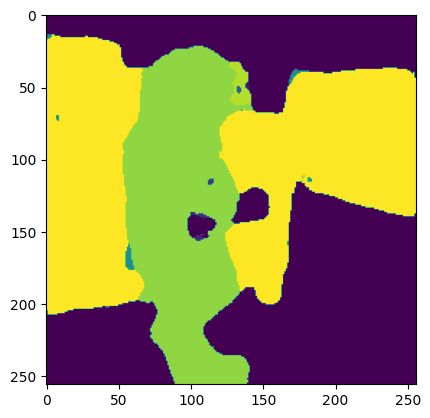

In [166]:
from torchvision.transforms import ToTensor, Compose, Resize,PILToTensor
# define a transform to convert a tensor to PIL image

imagesTransform = Compose([
            Resize((256,256)),
            ToTensor() 
            ])

targetTransform = Compose([
            Resize((256,256)),
            PILToTensor() 
            ])

train_dataset = torchvision.datasets.VOCSegmentation(root = "F:\Datasets\VOC", download = False, image_set= 'train', transform=imagesTransform, target_transform=targetTransform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))


feat = model(train_features)

print(feat.size())
feat = torch.argmax(feat, 1).squeeze()
feat_cpu = feat.cpu().numpy()
print(np.unique(feat_cpu))
plt.imshow(feat_cpu*255/21)
plt.show()



In [170]:
#test quantization
model.qconfig = torch.ao.quantization.default_qconfig
print(model.qconfig)
torch.ao.quantization.prepare(model, inplace=True)
torch.ao.quantization.convert(model, inplace=True)
torch.save(model.state_dict(), "teeest")

QConfig(activation=functools.partial(<class 'torch.ao.quantization.observer.MinMaxObserver'>, quant_min=0, quant_max=127){}, weight=functools.partial(<class 'torch.ao.quantization.observer.MinMaxObserver'>, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric){})


c:\Users\uie33326\.conda\envs\CNNs\lib\site-packages\torch\ao\quantization\utils.py:287: UserWarning: must run observer before calling calculate_qparams. Returning default values.
  warnings.warn(
